In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image 

In [5]:
train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2   )
train_data = train_gen.flow_from_directory('D:/downloads/casting_data/casting_data/train',
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('D:/downloads/casting_data/casting_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential()
#convolution+pooling
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
#second layer
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Flatten())  #flattening the image into 1d array


#creating nueral network 
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu')) 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                                  
                               

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


830/830 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.6224 - loss: 0.6462 - val_accuracy: 0.5678 - val_loss: 0.8151
Epoch 2/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8152 - loss: 0.3944 - val_accuracy: 0.8797 - val_loss: 0.2998
Epoch 3/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.8643 - loss: 0.3044 - val_accuracy: 0.8685 - val_loss: 0.2968
Epoch 4/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9120 - loss: 0.2257 - val_accuracy: 0.8028 - val_loss: 0.4189
Epoch 5/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.9235 - loss: 0.1916 - val_accuracy: 0.9147 - val_loss: 0.2163
Epoch 6/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9417 - loss: 0.1414 - val_accuracy: 0.8685 - val_loss: 0.4003
Epoch 7/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9517 - loss: 0.1277 - val_accuracy: 0.9483 - val_loss: 0.1234
Epoch 8/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9580 - loss: 0.1202 - val_accurac

In [16]:
 model.save('best_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


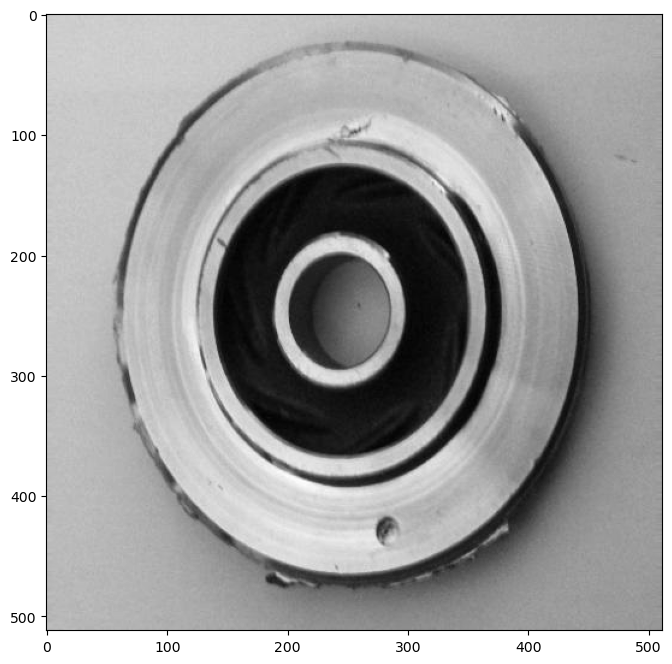

In [34]:
test_image = image.load_img('C:/Users/sande/OneDrive/Desktop/cast_def_0_150.jpg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

import cv2
img = cv2.imread('C:/Users/sande/OneDrive/Desktop/cast_def_0_150.jpg',0)
img = img/255 #rescalinng
pred_img =img.copy()
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.show()

In [36]:
result

array([[7.408278e-11]], dtype=float32)

In [38]:
if result[0]<=0.1:
    print('Defective')
else :
    print('Not Defective')

Defective


In [60]:
import cv2
img = cv2.imread('C:/Users/sande/OneDrive/Desktop/cast_ok_0_37.jpg',0)
img = img/255 #rescalinng
pred_img =img.copy()

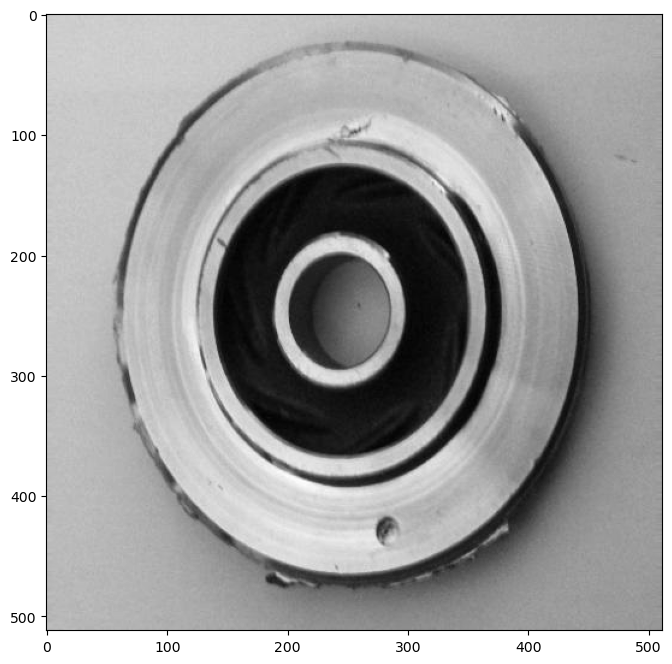

In [104]:
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.show()